# Preliminaries

What will be covered:

### Day 1
- Why logistic regression? What does it do?
- Modules utilized in building logistic regression models; this will involve
    - Visualization
    - Randomization
    - Pandas
- Quick run-through a toy logistic regression example. 
- Extending the example to realistic data
    - Categorical and numerical variables
- Test and training data
- Cross validation. 
- Exercises

### Day 2
- Theory behind Logistic Regression
- Overfitting, regularization.
- Wide margin classifiers: SVMs.
- Exercises

### Day 3
- Practice and compare logistic regression, SVMs on realistic data sets.
- Mini hackathon.

## Day 1

Some modules that we will cover before launching into Logistic Regression head on. 

Modules:
- Visualization
    - Using matplotlib
    - Using seaborn
- Randomization
    - Using numpy.random
- Pandas 
    - Using dataframes

Quick test:
- We want to generate n (say 100) points in 2D randomly in a bounding box.
- We want to generate n points in 2D colored in _one of two colors_. 

Let's tackle the first of the above tasks.


## Useful Imports

First, the imports. Declare matplotlib inline so that the plots show in this very notebook.

In [105]:
%matplotlib inline
import numpy as np
from numpy import random
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import IPython

print 'IPython version:', IPython.__version__
print 'numpy version:', np.__version__
print 'scikit-learn version:', sk.__version__
print 'matplotlib version:', matplotlib.__version__

IPython version: 4.0.0
numpy version: 1.11.0
scikit-learn version: 0.17.1
matplotlib version: 1.5.1


## Cheat-sheet

Useful modules/methods:
- sklearn
    - linear_model.LogisticRegression
    - linear_model.LogisticRegression.fit
    - linear_model.LogisticRegression.score
    - datasets.make_classification
- numpy (np)
    - ravel
    - vstack
    - reshape
    - random
    - random.uniform
- matplotlib.pyplot

## Step 1: Randomization

In [106]:
a = random.rand(2, 3)
print a

[[ 0.64629094  0.81231631  0.11872653]
 [ 0.83293589  0.51152743  0.08562653]]


In [45]:
b = random.randn(2, 3)
print b

[[ 0.07465884 -1.49060033 -0.15150364]
 [ 0.38542729 -0.76019351 -0.17416547]]


In [46]:
coordstest = np.vstack([np.random.uniform(150, 220, 20), 
                        np.random.uniform(150, 220, 20)]).T

In [146]:
coordstest

array([[ 214.83320779,  204.5623656 ],
       [ 199.13417269,  173.32750854],
       [ 197.21948022,  160.94429629],
       [ 205.09461993,  175.84857786],
       [ 169.73394644,  165.94826058],
       [ 203.34150186,  202.45414548],
       [ 194.45865979,  173.76158205],
       [ 153.17551863,  178.48530574],
       [ 189.45908951,  173.74628407],
       [ 207.07091176,  189.0628414 ],
       [ 157.50551955,  196.485188  ],
       [ 211.43990405,  217.67853912],
       [ 159.69386982,  190.80260274],
       [ 184.28568069,  216.9667582 ],
       [ 193.96820133,  209.8131571 ],
       [ 206.863752  ,  197.57100913],
       [ 153.21635988,  211.90753771],
       [ 181.40828854,  182.336633  ],
       [ 184.47894857,  212.05087003],
       [ 216.5004355 ,  153.36452513]])

In [176]:
individuals = (np.arange(0,200).reshape(-1,1)*np.ones(10).reshape(1,-1)).flatten()
individuals = pd.Series(individuals)
aa = np.arange(0, 200).reshape(-1, 1) # -1 is proxy for 200; has 200 rows and 1 column
bb = np.ones(10).reshape(1,-1) # 1 row, 10 columns
cc = aa*bb
print cc.shape

(200, 10)


In [161]:
corr = -0.95
means = [200, 100]
stds = [10, 20]
covs = [[stds[0]**2, stds[0]*stds[1]*corr],[stds[0]*stds[1]*corr, stds[1]**2]]
print covs

[[100, -190.0], [-190.0, 400]]


In [162]:
coords = np.vstack([np.random.multivariate_normal(coordstest[i,:], covs, 200) 
                         for i in range(10)])

## Step 2: Visualization

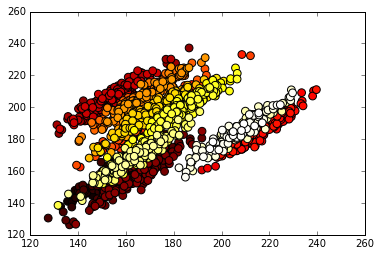

In [163]:
plt.scatter(allCoords['x'], allCoords['y'], c = individuals, 
      s = 60, cmap = 'hot')

Now, we are going to try generating N (for instance, 100) random 2D points, and color them as in red and yellow, 
then visualize them using matplotlib.

To show the varying effects, perform the following changes. 

Change
- N
- rand to randn 
- colors_used
- s, i.e. size of the points
- alpha, the shading of the colored points. 

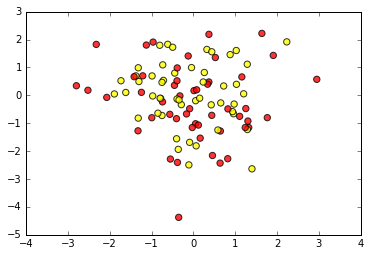

In [110]:
N = 100
x = np.random.randn(N)
y = np.random.randn(N)
colors = np.random.rand(N)
colors_used = [2, 3]
colors_used = ['yellow', 'red']
colors = colors_used*(N/len(colors_used))
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(x, y, s = 40, c = colors, alpha = 0.8)
plt.show()

## Step 3: Generating datasets. 

## Centering the points
The points from the two classes above seem to be overly mixed. In order to generate samples that are perhaps linearly separable, we will still pick from the normal distribution, but with different means $\mu_1, \mu_2$ and std. deviations $\sigma_1, \sigma_2$.

### Quiz Question:
Given a random variable $Z$ drawn from the *standard normal* distribution (i.e. $Z \sim N(0,1)$), how do we generate a variable that is drawn from $N(\mu, \sigma)$?

#### Hint: 
If $Z \sim N(0, 1)$, then 
* $Z + \mu \sim N(\mu, 1)$.
* $\sigma Z \sim N(0, \sigma)$.



### Centering and coloring the points.
We will keep two colors for now (say, red and yellow), variables $n_r$ and $n_y$ for the number of red and yellow points that we want to keep in our dataset. 

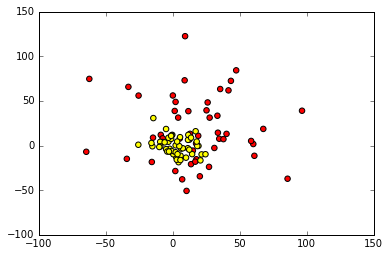

In [130]:
num_pts = [50, 50]
mu_vals = [20, 0]
sigma_vals = [40, 10]

red = 0
yellow = 1
x_r = sigma_vals[red]*np.random.randn(num_pts[red]) + mu_vals[red]
y_r = sigma_vals[red]*np.random.randn(num_pts[red]) + mu_vals[red]

x_y = sigma_vals[yellow]*np.random.randn(num_pts[yellow]) + mu_vals[yellow]
y_y = sigma_vals[yellow]*np.random.randn(num_pts[yellow]) + mu_vals[yellow]
colors = ['red']*num_pts[red] + ['yellow']*num_pts[yellow]

x = np.append(x_r, x_y)
y = np.append(y_r, y_y)

# While x = x_r + x_y would have worked for usual lists, these are numpy arrays, with their own concatenation
# function, np.append.

plt.scatter(x, y, s = 30, c = colors)